In [1]:
import pandas as pd
import pickle

In [2]:
%%time
june = pd.read_csv('../data/june.csv')
june.head()

Wall time: 25.5 s


,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-06-01 00:00:12,36.1202,-86.7534,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,Powered,90.0,scooter,0.06,Jump
1,2019-06-01 00:00:12,36.1630,-86.7765,Powered17715097-e8a0-5494-a5ab-9b625796607d,Powered,63.0,scooter,0.06,Jump
2,2019-06-01 00:00:12,36.1202,-86.7533,Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7,Powered,77.0,scooter,0.06,Jump
3,2019-06-01 00:00:12,36.1201,-86.7530,Powered71fa5e4f-1e17-54c4-936d-330df38cc2fa,Powered,0.0,scooter,0.06,Jump
4,2019-06-01 00:00:12,36.1622,-86.7806,Poweredfa549dd6-40bb-5757-ac87-2c2528f2bc68,Powered,2.0,scooter,0.06,Jump


In [3]:
june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28046095 entries, 0 to 28046094
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   pubdatetime  object 
 1   latitude     float64
 2   longitude    float64
 3   sumdid       object 
 4   sumdtype     object 
 5   chargelevel  float64
 6   sumdgroup    object 
 7   costpermin   float64
 8   companyname  object 
dtypes: float64(4), object(5)
memory usage: 1.9+ GB


In [4]:
june.isnull().sum()##CHARGE LEVEL COLUMN HAS 285 NULLS

pubdatetime      0
latitude         0
longitude        0
sumdid           0
sumdtype         0
chargelevel    285
sumdgroup        0
costpermin       0
companyname      0
dtype: int64

In [5]:
june.companyname.unique()

array(['Jump', 'Bird', 'Bolt', 'Gotcha', 'Spin', 'Lime', 'Lyft'],
      dtype=object)

In [6]:
company_dict = {'Bird':'Bi', 'Lyft': 'Ly', 'Gotcha': 'G', 'Lime': 'Li', 'Spin': 'S', 'Jump': 'J', 'Bolt': 'Bo'}

In [7]:
june.companyname = june.companyname.replace(company_dict)

In [8]:
june.pubdatetime = pd.to_datetime(june.pubdatetime)
june.head(2)


,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-06-01 00:00:12,36.1202,-86.7534,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,Powered,90.0,scooter,0.06,J
1,2019-06-01 00:00:12,36.1630,-86.7765,Powered17715097-e8a0-5494-a5ab-9b625796607d,Powered,63.0,scooter,0.06,J


In [9]:
june.sumdgroup.unique()


array(['scooter', 'Scooter', 'bicycle'], dtype=object)

In [10]:
june_scooters = june.loc[june.sumdgroup.isin(['scooter', 'Scooter'])]

In [11]:
june.sumdtype.unique() ##produces all the unique values in the sumdtype column

array(['Powered', 'Standard'], dtype=object)

In [12]:
june_scooters = june_scooters[['pubdatetime', 'latitude', 'longitude', 'sumdid', 'chargelevel', 'companyname']]

In [13]:
june_scooters = june.drop(columns=['chargelevel', 'costpermin']) ##drops columns chargelevel and cosstpermin from dataframe

In [14]:
june_scooters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28046095 entries, 0 to 28046094
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   sumdtype     object        
 5   sumdgroup    object        
 6   companyname  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 1.5+ GB


In [15]:
june_scooters.sumdid.unique()

array(['Powered93627c35-0f62-5b81-a78d-75a4a92ecf47',
       'Powered17715097-e8a0-5494-a5ab-9b625796607d',
       'Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7', ...,
       'Powered749778', 'Powered211807', 'Powered255293'], dtype=object)

In [16]:
june_scooters.sumdid.nunique() ##count the number of unique sumdid


7828

In [17]:
june_group=june_scooters.groupby(['sumdid'])['companyname'].unique()

In [18]:
june_group.value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[Bi]    2910
[Li]    1461
[Ly]    1152
[J]     1036
[S]      713
[Bo]     333
[G]      223
Name: companyname, dtype: int64

In [19]:
june_group=june_scooters.groupby(['companyname'])['sumdid'].nunique()

In [20]:
june_group

companyname
Bi    2910
Bo     333
G      223
J     1036
Li    1461
Ly    1152
S      713
Name: sumdid, dtype: int64

In [21]:
june_scooters.to_pickle("../data/june.pkl")

In [22]:
%%time
june_test = pd.read_pickle("../data/june.pkl")

Wall time: 6.3 s


<AxesSubplot:>

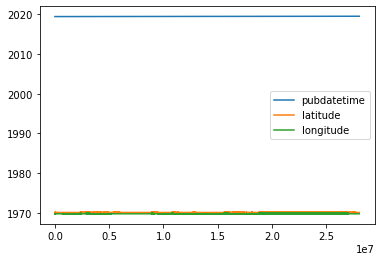

In [23]:
june_scooters.plot()